<a href="https://colab.research.google.com/github/JeffersonBP/DataScienceStudy/blob/main/T6_%E2%80%93_Atividade_de_Aprofundamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CARREGAMENTO DO DATA FRAME.

Aluno : Jefferson Batista Pereira

In [3]:
import pandas as pd

# Montar o Google Drive para acessar os arquivos
from google.colab import drive
drive.mount('/content/drive')

# Caminho do arquivo CSV
caminho_arquivo = '/content/drive/My Drive/Study/POS GRADUAÇÃO/POS GRADUAÇÃO MACKZIE/VISUALIZAÇÃO DE DADOS PARA TOMADA DE DECISÃO/archive/Medicaldataset.csv'

# Carregar o arquivo CSV em um DataFrame
df = pd.read_csv(caminho_arquivo)

# Exibir mensagem informando que o arquivo foi carregado
print("O arquivo foi carregado com sucesso.")

# Exibir o tamanho do arquivo
tamanho_arquivo = df.memory_usage(deep=True).sum()
print(f"Tamanho do arquivo: {tamanho_arquivo} bytes")

# Obter o número de linhas e colunas do DataFrame
num_linhas = df.shape[0]
num_colunas = df.shape[1]
print(f"Número de linhas: {num_linhas}")
print(f"Número de colunas: {num_colunas}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
O arquivo foi carregado com sucesso.
Tamanho do arquivo: 170279 bytes
Número de linhas: 1319
Número de colunas: 9


INICIO DA ANALIZE EXPLORATORIA.


* Visualizar as primeiras linhas do DataFrame para entender a estrutura dos dados.

* Verificar os tipos de dados das colunas.
* Verificar se há valores nulos no DataFrame.
* Exibir algumas estatísticas descritivas para colunas numéricas.
* Exibir contagem de valores únicos para colunas categóricas.

In [4]:
# Visualizar as primeiras linhas do DataFrame
print("Primeiras linhas do DataFrame:")
display(df.head())
print('============================================================')
print()
# Verificar os tipos de dados das colunas
print("\nTipos de dados das colunas:")
print(df.dtypes)
print('============================================================')
print()
# Verificar se há valores nulos no DataFrame
print("\nValores nulos no DataFrame:")
print(df.isnull().sum())
print('============================================================')
print()
# Exibir algumas estatísticas descritivas para colunas numéricas
print("\nEstatísticas descritivas para colunas numéricas:")
print(df.describe())
print('============================================================')
print()
# Exibir contagem de valores únicos para colunas categóricas
print("\nContagem de valores únicos para colunas categóricas:")
for column in df.select_dtypes(include=['object']).columns:
    print(f"\n{column}:")
    print(df[column].value_counts())
    print('============================================================')
    print()


Primeiras linhas do DataFrame:


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative




Tipos de dados das colunas:
Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                       object
dtype: object


Valores nulos no DataFrame:
Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64


Estatísticas descritivas para colunas numéricas:
               Age       Gender   Heart rate  Systolic blood pressure  \
count  1319.000000  1319.000000  1319.000000              1319.000000   
mean     56.193328     0.659591    78.336619               127.170584   
std      13.638173     0.474027    51.630270     

##Vamos entender um pouco mais sobre os dados

In [7]:
for col in df.columns:
  print(f'unique({col}) = {len(df[col].unique())}')


unique(Age) = 75
unique(Gender) = 2
unique(Heart rate) = 79
unique(Systolic blood pressure) = 116
unique(Diastolic blood pressure) = 73
unique(Blood sugar) = 244
unique(CK-MB) = 700
unique(Troponin) = 352
unique(Result) = 2


##vamos montar uma visualização para o data frame

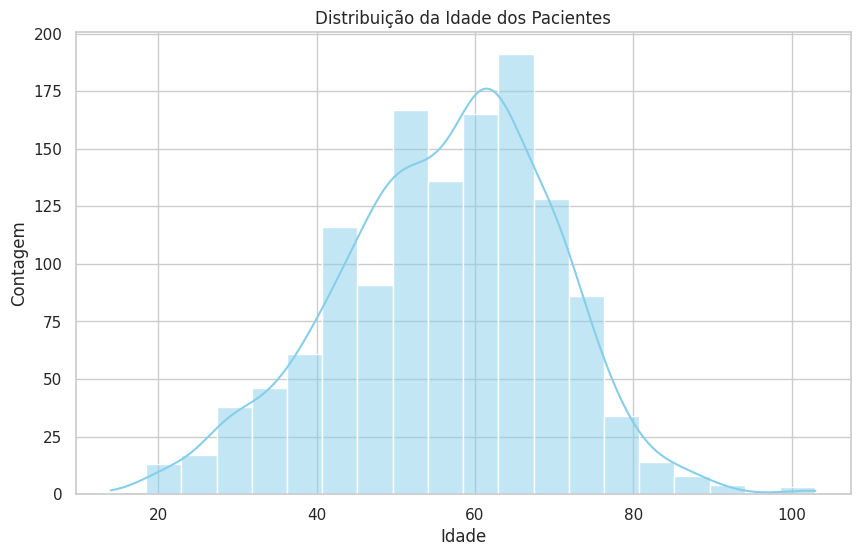

<ipython-input-44-6d695e13535f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


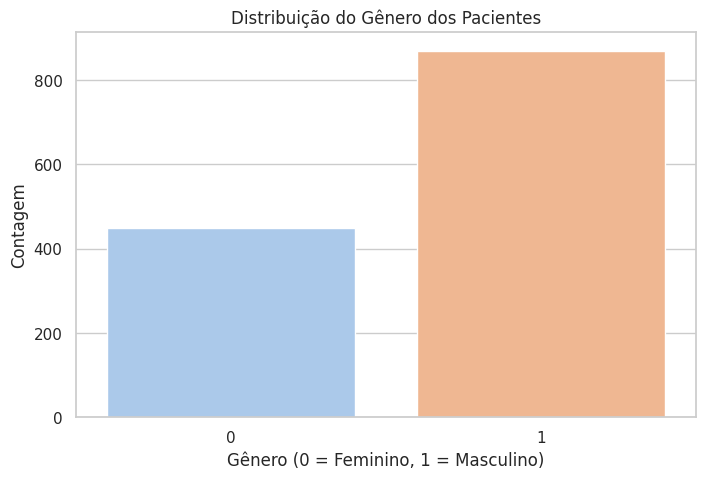

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# Visualização 1: Distribuição da Idade (Age)
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição da Idade dos Pacientes')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

# Visualização 2: Distribuição do Gênero (Gender)
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Distribuição do Gênero dos Pacientes')
plt.xlabel('Gênero (0 = Feminino, 1 = Masculino)')
plt.ylabel('Contagem')
plt.show()


In [12]:
import pandas as pd

# Supondo que 'df' seja o nome do seu DataFrame

# Função para encontrar o valor mais comum em uma coluna
def valor_mais_comum(coluna):
    contagem_valores = coluna.value_counts()
    valor_mais_comum = contagem_valores.idxmax()
    ocorrencias_valor_mais_comum = contagem_valores.max()
    percentual = (ocorrencias_valor_mais_comum / len(coluna)) * 100
    return valor_mais_comum, ocorrencias_valor_mais_comum, percentual

# Dicionário para armazenar o valor mais comum, quantidade de vezes que se repete e percentual em cada coluna
valores_mais_comuns = {}

# Iterar sobre todas as colunas do DataFrame
for coluna in df.columns:
    valor, ocorrencias, percentual = valor_mais_comum(df[coluna])
    valores_mais_comuns[coluna] = {'valor_mais_comum': valor, 'ocorrencias': ocorrencias, 'percentual': percentual}

# Imprimir o valor mais comum, quantidade de vezes que se repete e percentual em cada coluna
for coluna, info in valores_mais_comuns.items():
    print(f"Para a coluna '{coluna}':")
    print("Valor mais comum:", info['valor_mais_comum'])
    print("Número de ocorrências:", info['ocorrencias'])
    print("Percentual:", info['percentual'], "%")
    print("------------------------")


Para a coluna 'Age':
Valor mais comum: 60
Número de ocorrências: 106
Percentual: 8.03639120545868 %
------------------------
Para a coluna 'Gender':
Valor mais comum: 1
Número de ocorrências: 870
Percentual: 65.95905989385898 %
------------------------
Para a coluna 'Heart rate':
Valor mais comum: 60
Número de ocorrências: 95
Percentual: 7.202426080363912 %
------------------------
Para a coluna 'Systolic blood pressure':
Valor mais comum: 150
Número de ocorrências: 50
Percentual: 3.790750568612585 %
------------------------
Para a coluna 'Diastolic blood pressure':
Valor mais comum: 75
Número de ocorrências: 69
Percentual: 5.231235784685367 %
------------------------
Para a coluna 'Blood sugar':
Valor mais comum: 100.0
Número de ocorrências: 41
Percentual: 3.10841546626232 %
------------------------
Para a coluna 'CK-MB':
Valor mais comum: 300.0
Número de ocorrências: 19
Percentual: 1.4404852160727823 %
------------------------
Para a coluna 'Troponin':
Valor mais comum: 0.003
Número 

Podemos formular algumas perguntas para nos ajudar a entender melhor o data sete.


* Para a coluna 'Age':

Qual é a faixa etária média dos pacientes?
Existe uma faixa etária específica que está mais presente nos dados?

* Para a coluna 'Gender':

Qual é a distribuição de gênero dos pacientes na amostra?
Há uma predominância de um gênero em relação ao outro?

* Para a coluna 'Heart rate':

Qual é a faixa de frequência cardíaca mais comum entre os pacientes?
Existem valores de frequência cardíaca que podem ser considerados anormais?

* Para a coluna 'Systolic blood pressure':

Qual é a pressão arterial sistólica média dos pacientes?
Há uma tendência para valores mais altos ou mais baixos de pressão arterial sistólica?

* Para a coluna 'Diastolic blood pressure':

Qual é a pressão arterial diastólica média dos pacientes?
Existem padrões ou valores anormais de pressão arterial diastólica?

* Para a coluna 'Blood sugar':

Qual é a média de níveis de açúcar no sangue dos pacientes?
Há uma prevalência de valores normais ou anormais de açúcar no sangue?

* Para a coluna 'CK-MB':

Qual é a distribuição dos níveis de CK-MB entre os pacientes?
Existem valores extremos que possam indicar condições médicas específicas?

* Para a coluna 'Troponin':


* Como estão distribuídos os níveis de troponina entre os pacientes?

Quais são os valores mais comuns de troponina e eles podem indicar alguma condição médica?

* Para a coluna 'Result':

Qual é a proporção de resultados positivos e negativos nos testes realizados?
Há algum desequilíbrio nos resultados que possa ser relevante clinicamente?

In [14]:

# 1. Qual é a faixa etária média dos pacientes?
faixa_etaria_media = df['Age'].mean()
print("1. Faixa etária média dos pacientes:", faixa_etaria_media)
print('------------------------------------------------------')
print()

# 2. Qual é a distribuição de gênero dos pacientes na amostra?
distribuicao_genero = df['Gender'].value_counts(normalize=True) * 100
print("2. Distribuição de gênero dos pacientes:")
print(distribuicao_genero)
print('------------------------------------------------------')
print()

# 3. Qual é a faixa de frequência cardíaca mais comum entre os pacientes?
frequencia_cardiaca_comum = df['Heart rate'].mode().iloc[0]
print("3. Frequência cardíaca mais comum entre os pacientes:", frequencia_cardiaca_comum)
print('------------------------------------------------------')
print()
# 4. Qual é a pressão arterial sistólica média dos pacientes?
pressao_sistolica_media = df['Systolic blood pressure'].mean()
print("4. Pressão arterial sistólica média dos pacientes:", pressao_sistolica_media)
print('------------------------------------------------------')
print()

# 5. Qual é a pressão arterial diastólica média dos pacientes?
pressao_diastolica_media = df['Diastolic blood pressure'].mean()
print("5. Pressão arterial diastólica média dos pacientes:", pressao_diastolica_media)
print('------------------------------------------------------')
print()

# 6. Qual é a média de níveis de açúcar no sangue dos pacientes?
nivel_acucar_medio = df['Blood sugar'].mean()
print("6. Média de níveis de açúcar no sangue dos pacientes:", nivel_acucar_medio)
print('------------------------------------------------------')
print()

# 7. Qual é a distribuição dos níveis de CK-MB entre os pacientes?
distribuicao_ckmb = df['CK-MB'].describe()
print("7. Distribuição dos níveis de CK-MB entre os pacientes:")
print(distribuicao_ckmb)
print('------------------------------------------------------')
print()
# 8. Como estão distribuídos os níveis de troponina entre os pacientes?
distribuicao_troponina = df['Troponin'].describe()
print("8. Distribuição dos níveis de troponina entre os pacientes:")
print(distribuicao_troponina)
print('------------------------------------------------------')
print()

# 9. Qual é a proporção de resultados positivos e negativos nos testes realizados?
proporcao_resultados = df['Result'].value_counts(normalize=True) * 100
print("9. Proporção de resultados positivos e negativos nos testes realizados:")
print(proporcao_resultados)


1. Faixa etária média dos pacientes: 56.19332827899924
------------------------------------------------------

2. Distribuição de gênero dos pacientes:
1    65.95906
0    34.04094
Name: Gender, dtype: float64
------------------------------------------------------

3. Frequência cardíaca mais comum entre os pacientes: 60
------------------------------------------------------

4. Pressão arterial sistólica média dos pacientes: 127.17058377558757
------------------------------------------------------

5. Pressão arterial diastólica média dos pacientes: 72.26914329037149
------------------------------------------------------

6. Média de níveis de açúcar no sangue dos pacientes: 146.63434420015165
------------------------------------------------------

7. Distribuição dos níveis de CK-MB entre os pacientes:
count    1319.000000
mean       15.274306
std        46.327083
min         0.321000
25%         1.655000
50%         2.850000
75%         5.805000
max       300.000000
Name: CK-MB, dtyp

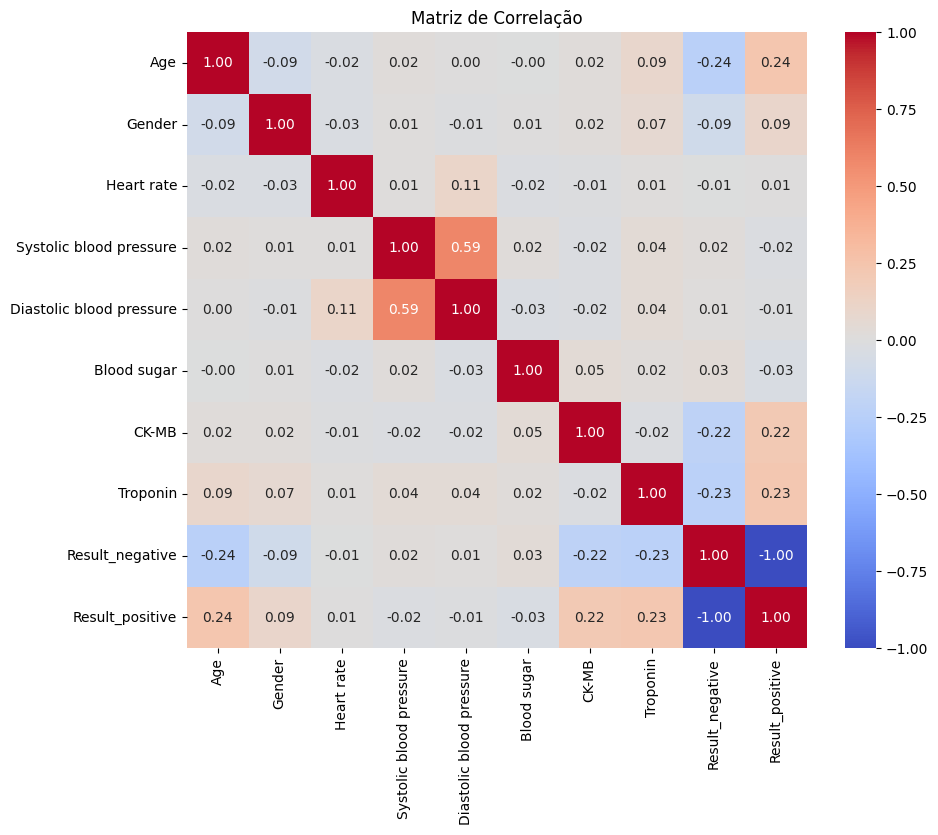

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que o DataFrame seja chamado de 'df'
# Supondo que 'Result' é a variável que queremos transformar com hot encoding

# Fazendo hot encoding da variável 'Result'
df = pd.get_dummies(df, columns=['Result'], prefix='Result')

# Calculando a matriz de correlação
correlation_matrix = df.corr()

# Plotando o gráfico de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


In [25]:
# Calculando as correlações das variáveis 'Result' com todas as outras variáveis
result_correlations = df.corr()['Result_positive'].abs().sort_values(ascending=False)

# Exibindo as correlações
print("Correlações das variáveis 'Result' com outras variáveis:")
print(result_correlations)



result_correlations = df.corr()['Result_negative'].abs().sort_values(ascending=False)

# Exibindo as correlações
print("Correlações das variáveis 'Result' com outras variáveis:")
print(result_correlations)


Correlações das variáveis 'Result' com outras variáveis:
Result_positive             1.000000
Result_negative             1.000000
Age                         0.238002
Troponin                    0.229376
CK-MB                       0.217720
Gender                      0.094432
Blood sugar                 0.033059
Systolic blood pressure     0.020825
Diastolic blood pressure    0.009659
Heart rate                  0.006920
Name: Result_positive, dtype: float64
------------------------------------------------------

Correlações das variáveis 'Result' com outras variáveis:
Result_negative             1.000000
Result_positive             1.000000
Age                         0.238002
Troponin                    0.229376
CK-MB                       0.217720
Gender                      0.094432
Blood sugar                 0.033059
Systolic blood pressure     0.020825
Diastolic blood pressure    0.009659
Heart rate                  0.006920
Name: Result_negative, dtype: float64
